In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

In [2]:
# Matplotlib settings to make the plots look a little nicer.

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'

In [3]:
def play(x, fs, autoplay=False):
    display(Audio(x, rate=fs, autoplay=autoplay))

In [4]:
def plot_signal(time_vec,x_0,xlim=None,title=None):
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2,1,1)
    ax.plot(time_vec,x_0)
    ax.set_xticklabels([])
    ax.set_ylabel('x(t)')
    ax.set_xlim(xlim)
    ax.set_title(title)

    ax = fig.add_subplot(2,1,2)
    samplerate = 1./(time_vec[1]-time_vec[0])
    ax.specgram(x_0,Fs=samplerate)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Hz')
    ax.set_xlim(xlim)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

In [5]:
def plot_histogram(x_0,bins=100,title=None):
    fig = plt.figure(figsize=(15,8))

    ax = fig.add_subplot(1,1,1)
    ax.hist(x_0,bins=bins,ec='k')
    ax.set_xlabel('x(t)')
    ax.set_title(title)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

# Define and Plot Template

In [6]:
samplerate = 50549

In [7]:
template = np.random.randn(samplerate)
template_time_vec = np.arange(len(template))*(1./samplerate)
play(template,samplerate)

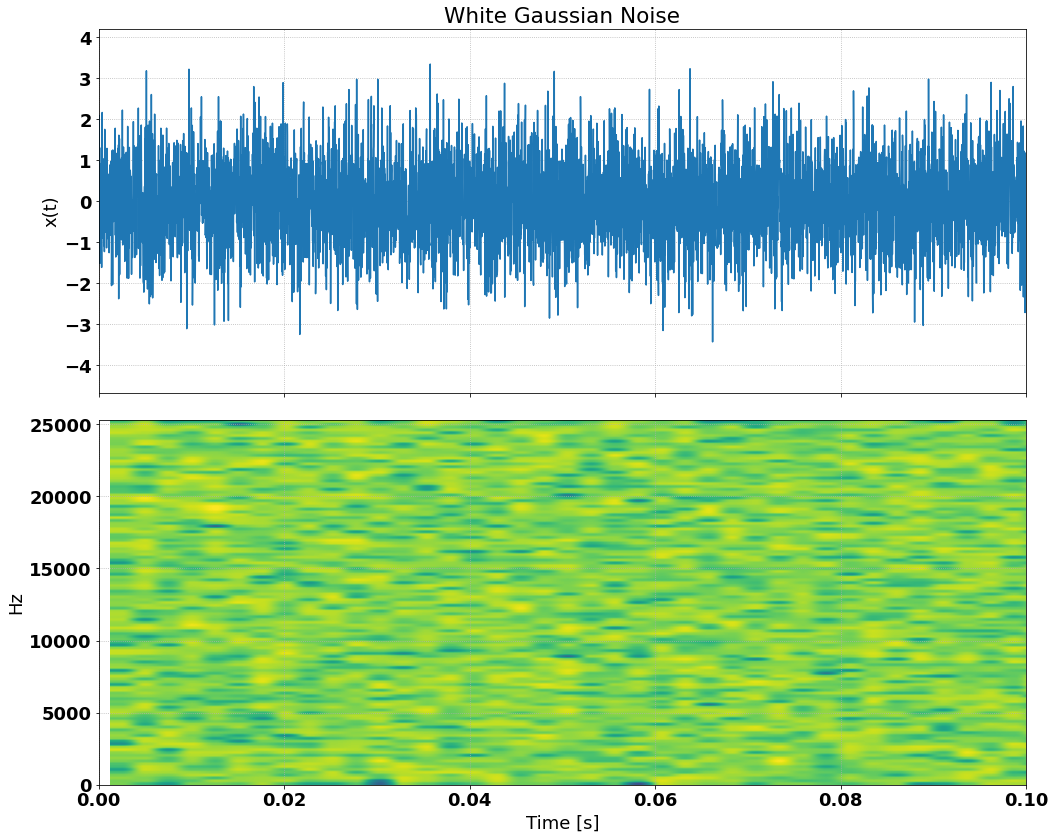

In [8]:
plot_signal(template_time_vec,template,xlim=(0,0.1),title='White Gaussian Noise')

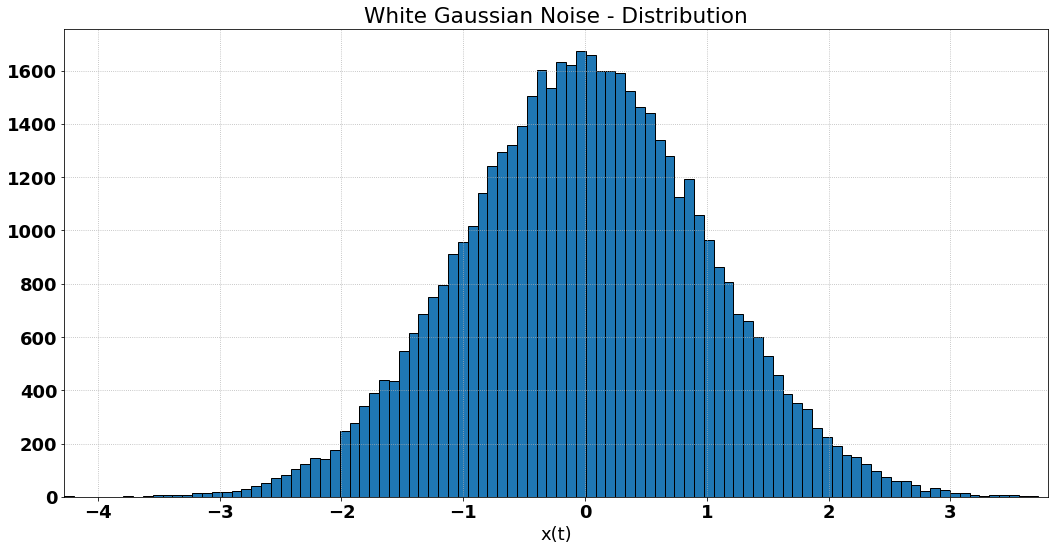

In [9]:
plot_histogram(template,title='White Gaussian Noise - Distribution')

# Define 10 Second Random Signals

In [10]:
x        = np.random.randn(10*samplerate)
time_vec = np.arange(len(x))*(1./samplerate)
play(x,samplerate)

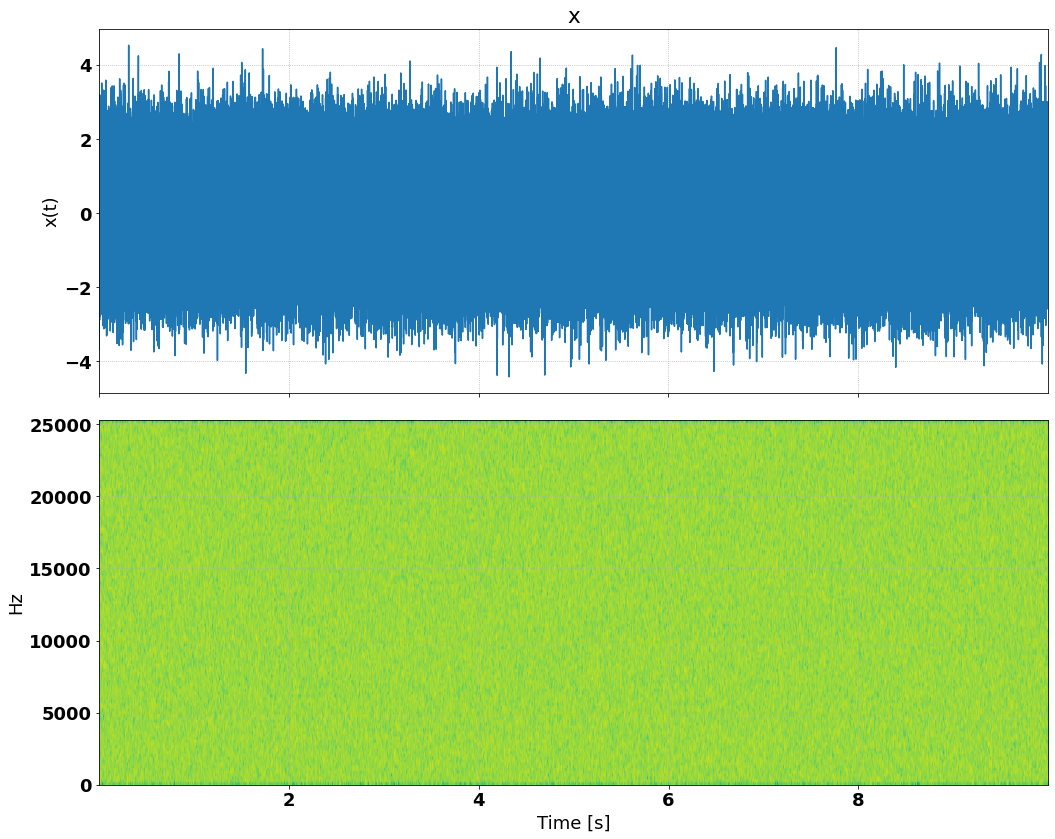

In [11]:
plot_signal(time_vec,x,None,'x')

In [12]:
y        = np.random.randn(10*samplerate)
play(y,samplerate)

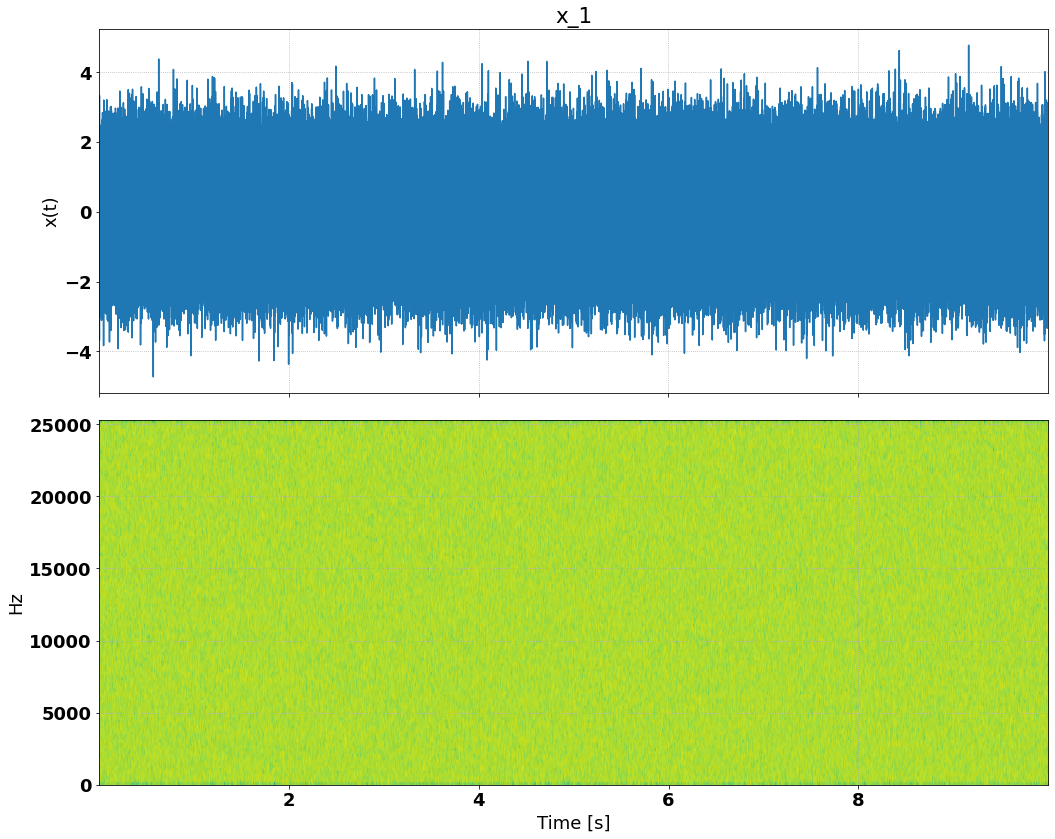

In [13]:
plot_signal(time_vec,y,None,'x_1')

# Auto-correlate $x$

In [14]:
Rxx = np.correlate(x,x,mode='same')
tau = time_vec - time_vec[-1]/2.

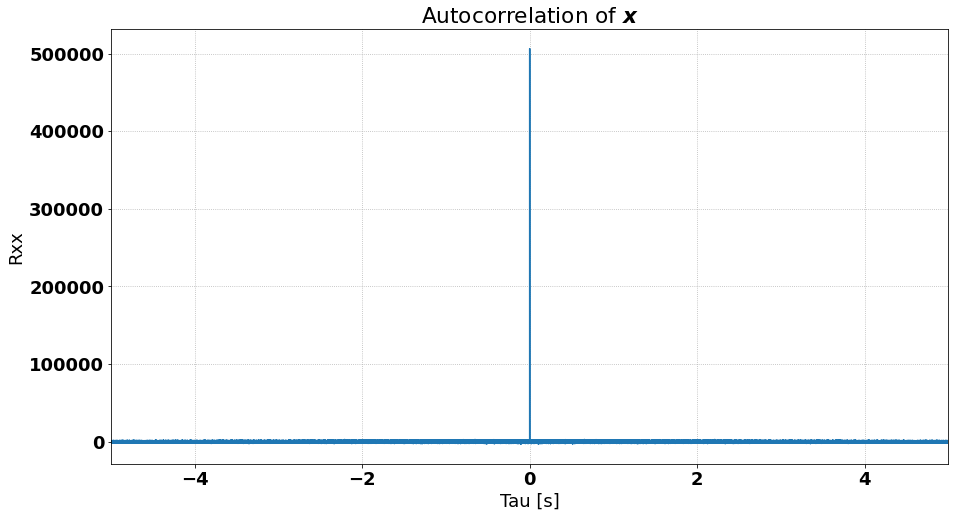

In [15]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxx)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxx')
ax.set_title('Autocorrelation of $x$')

plt.show()
plt.close(fig)

# Cross-Correlation of $x$ and $y$

In [16]:
Rxy = np.correlate(x,y,mode='same')

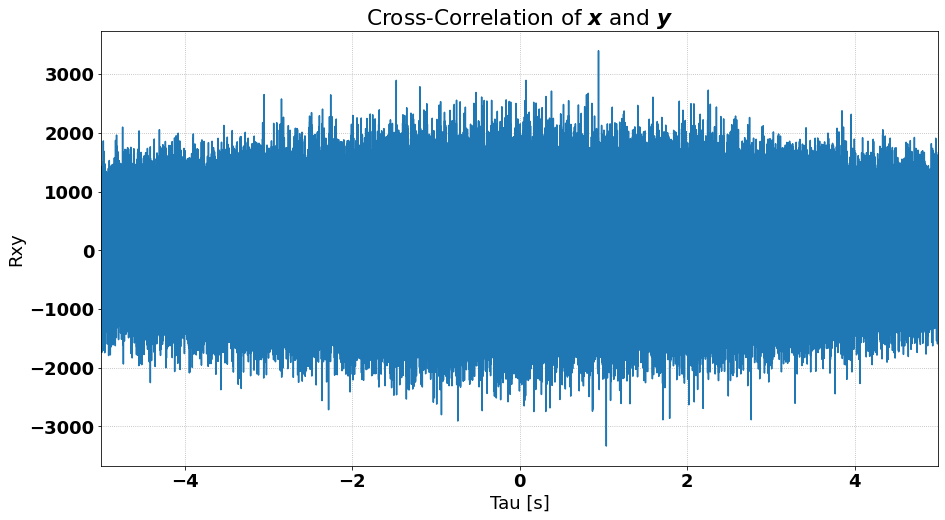

In [17]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxy)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of $x$ and $y$')

plt.show()
plt.close(fig)

# Hide Template Into $x$

In [18]:
sTime = 1
sInx  = int(sTime*samplerate)
eInx  = sInx + len(template)

In [19]:
x_1   = x.copy()
x_1[sInx:eInx] = x_1[sInx:eInx]+template

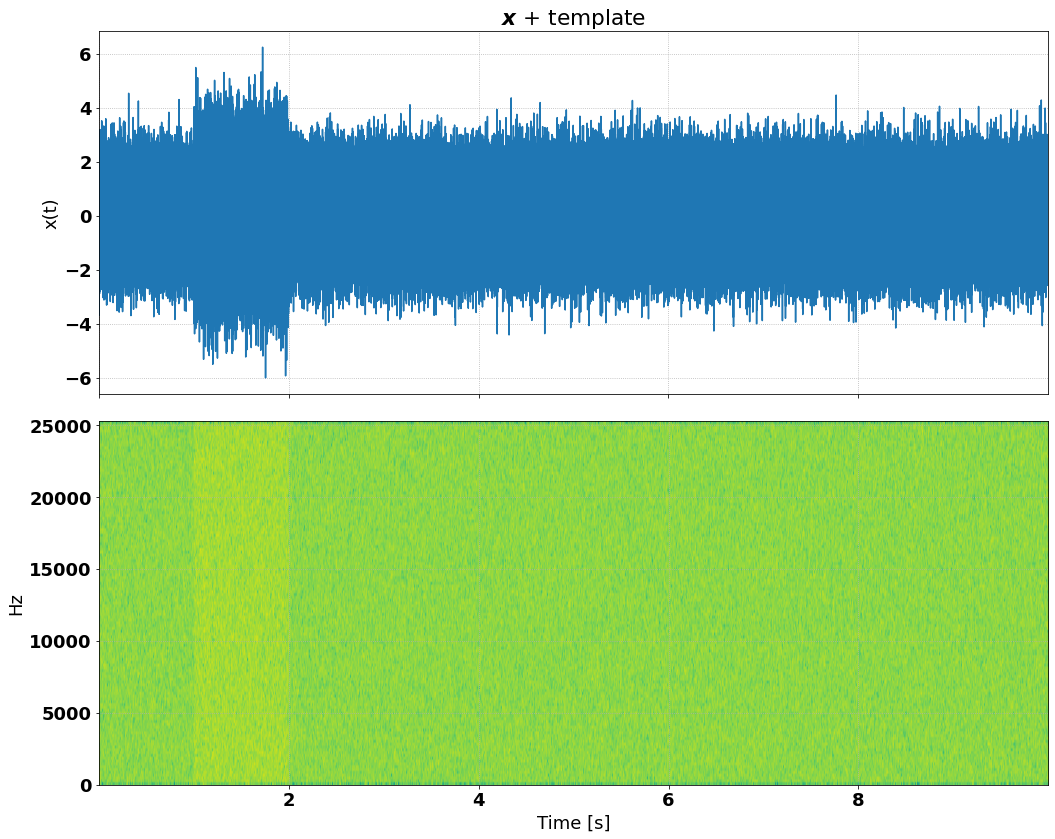

In [20]:
plot_signal(time_vec,x_1,None,'$x$ + template')

In [21]:
x_1[:sInx] = x_1[:sInx] + y[:sInx]
x_1[eInx:] = x_1[eInx:] + y[eInx:]

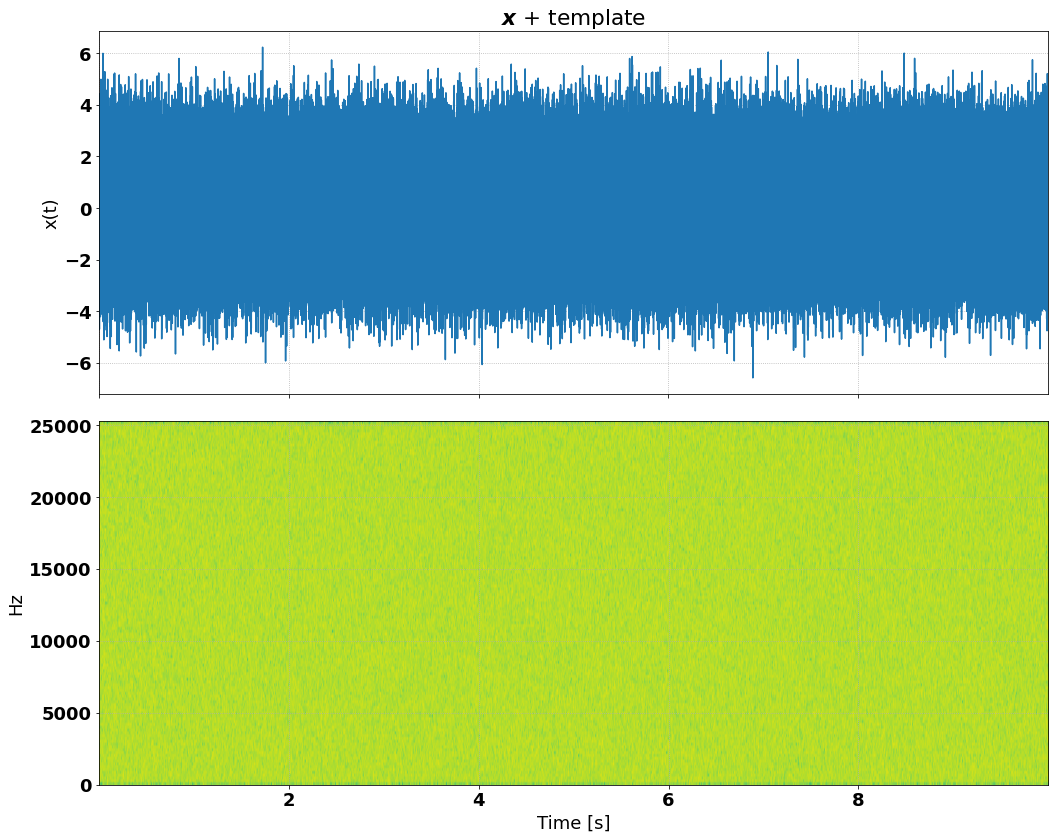

In [22]:
plot_signal(time_vec,x_1,None,'$x$ + template')


# Find the Template

In [23]:
Rxy = np.correlate(x_1,template,mode='valid')
tau = np.arange(len(Rxy))*(1./samplerate)

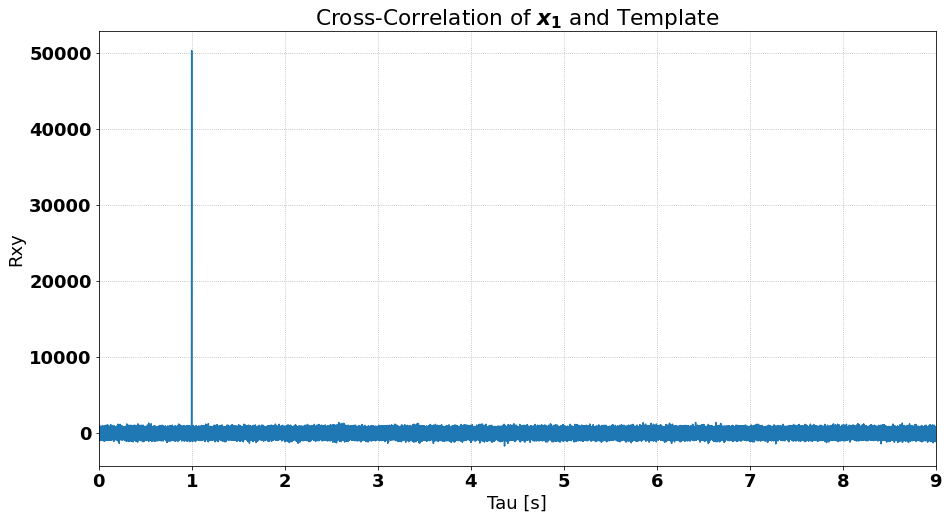

In [24]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxy)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of $x_1$ and Template')

plt.show()
plt.close(fig)

In [25]:
np.argmax(Rxy)

50549

In [26]:
tau[50622]

1.0014441433064947